## Crop Recommendation System

In [48]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Loading the dataset
df=pd.read_csv("Crop_recommendation.csv")
df.head()  # printing the first 5 values

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [50]:
df.shape

(2200, 8)

In [51]:
# Extracting the column names of the dataset
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [52]:
# Extracting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [53]:
# check any null value in the dataset
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [54]:
# check duplicate values in the dataset
df.duplicated().sum()

np.int64(0)

In [55]:
# Extract the statistics of the dataset
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [56]:
# Check the target feature distribution
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [57]:
features=df.columns.to_list()
features.remove('label')
features

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

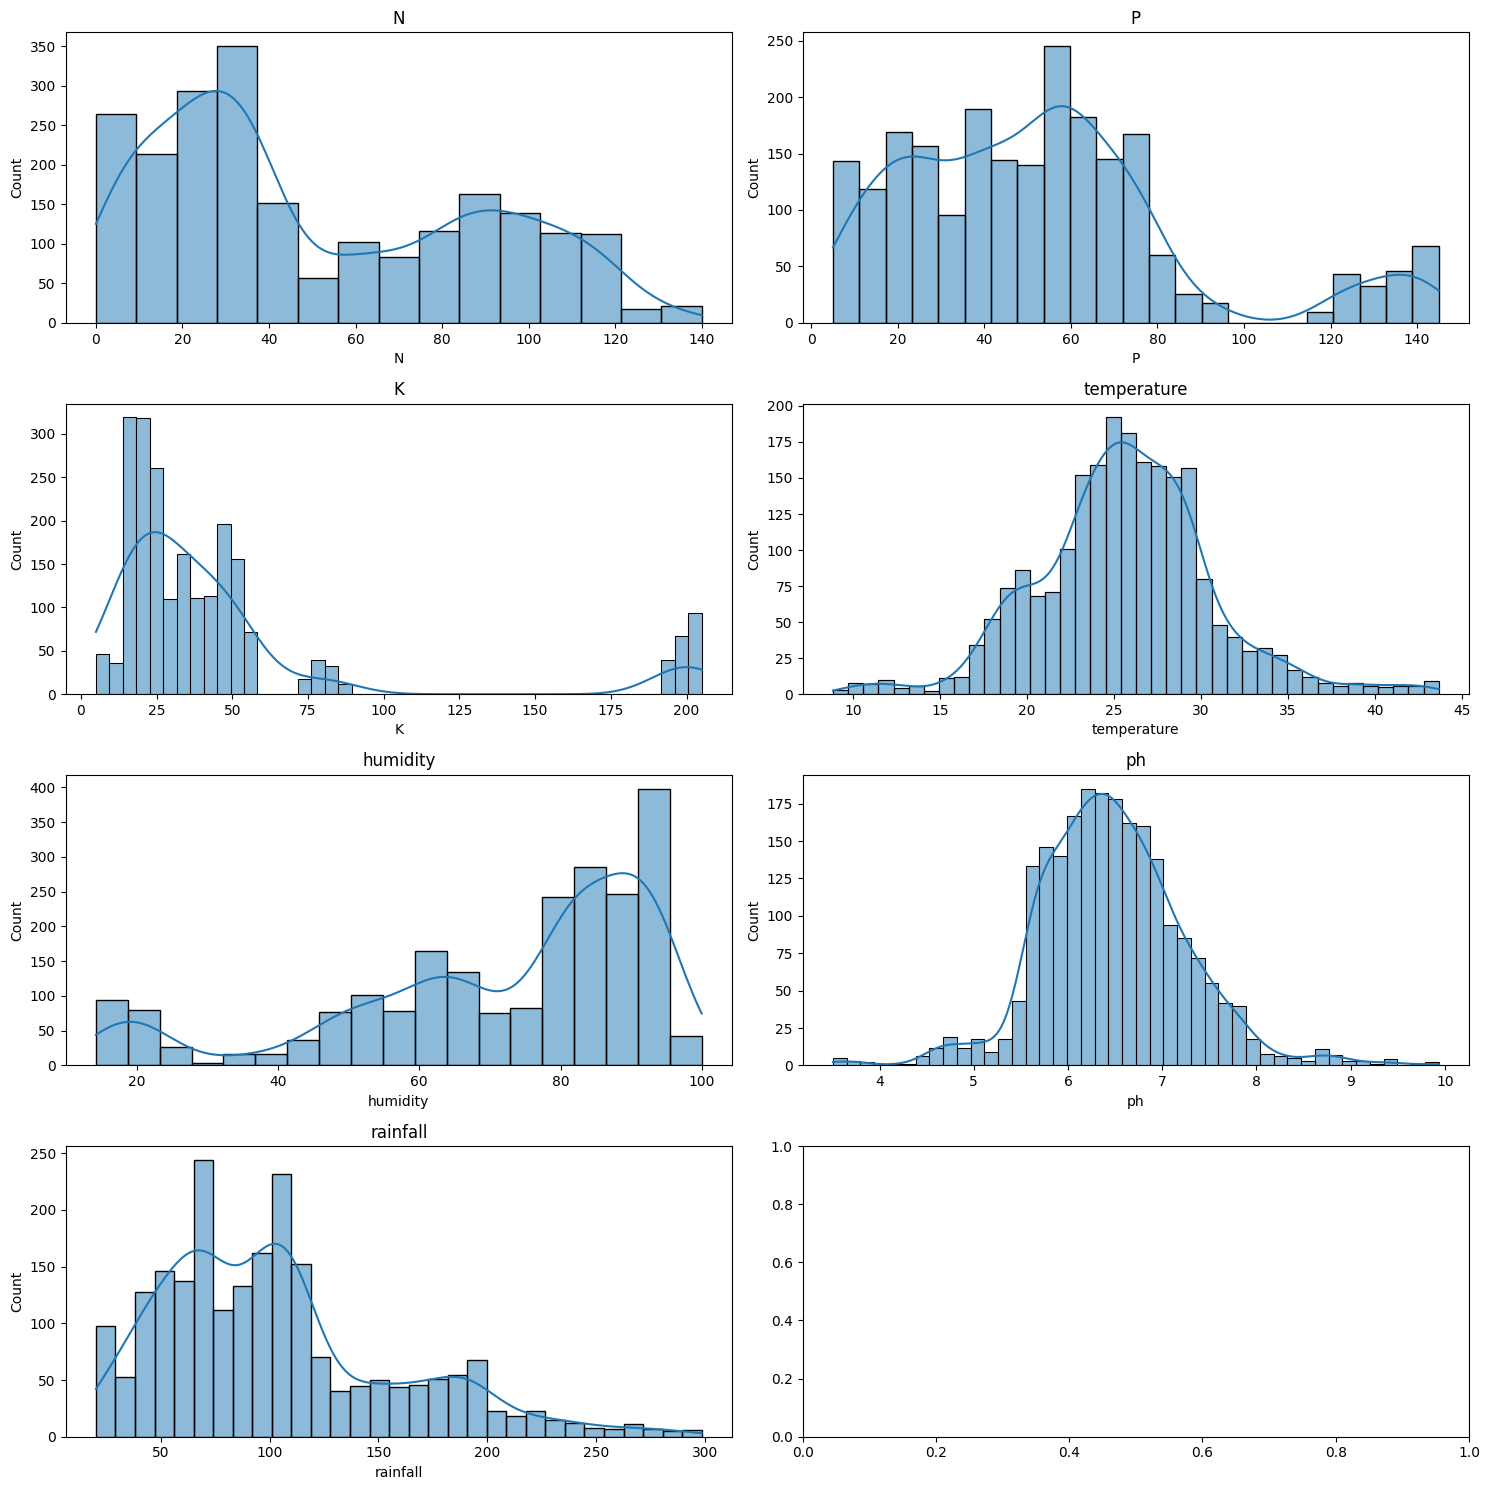

In [58]:
fig, ax=plt.subplots(4,2, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(df[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()    

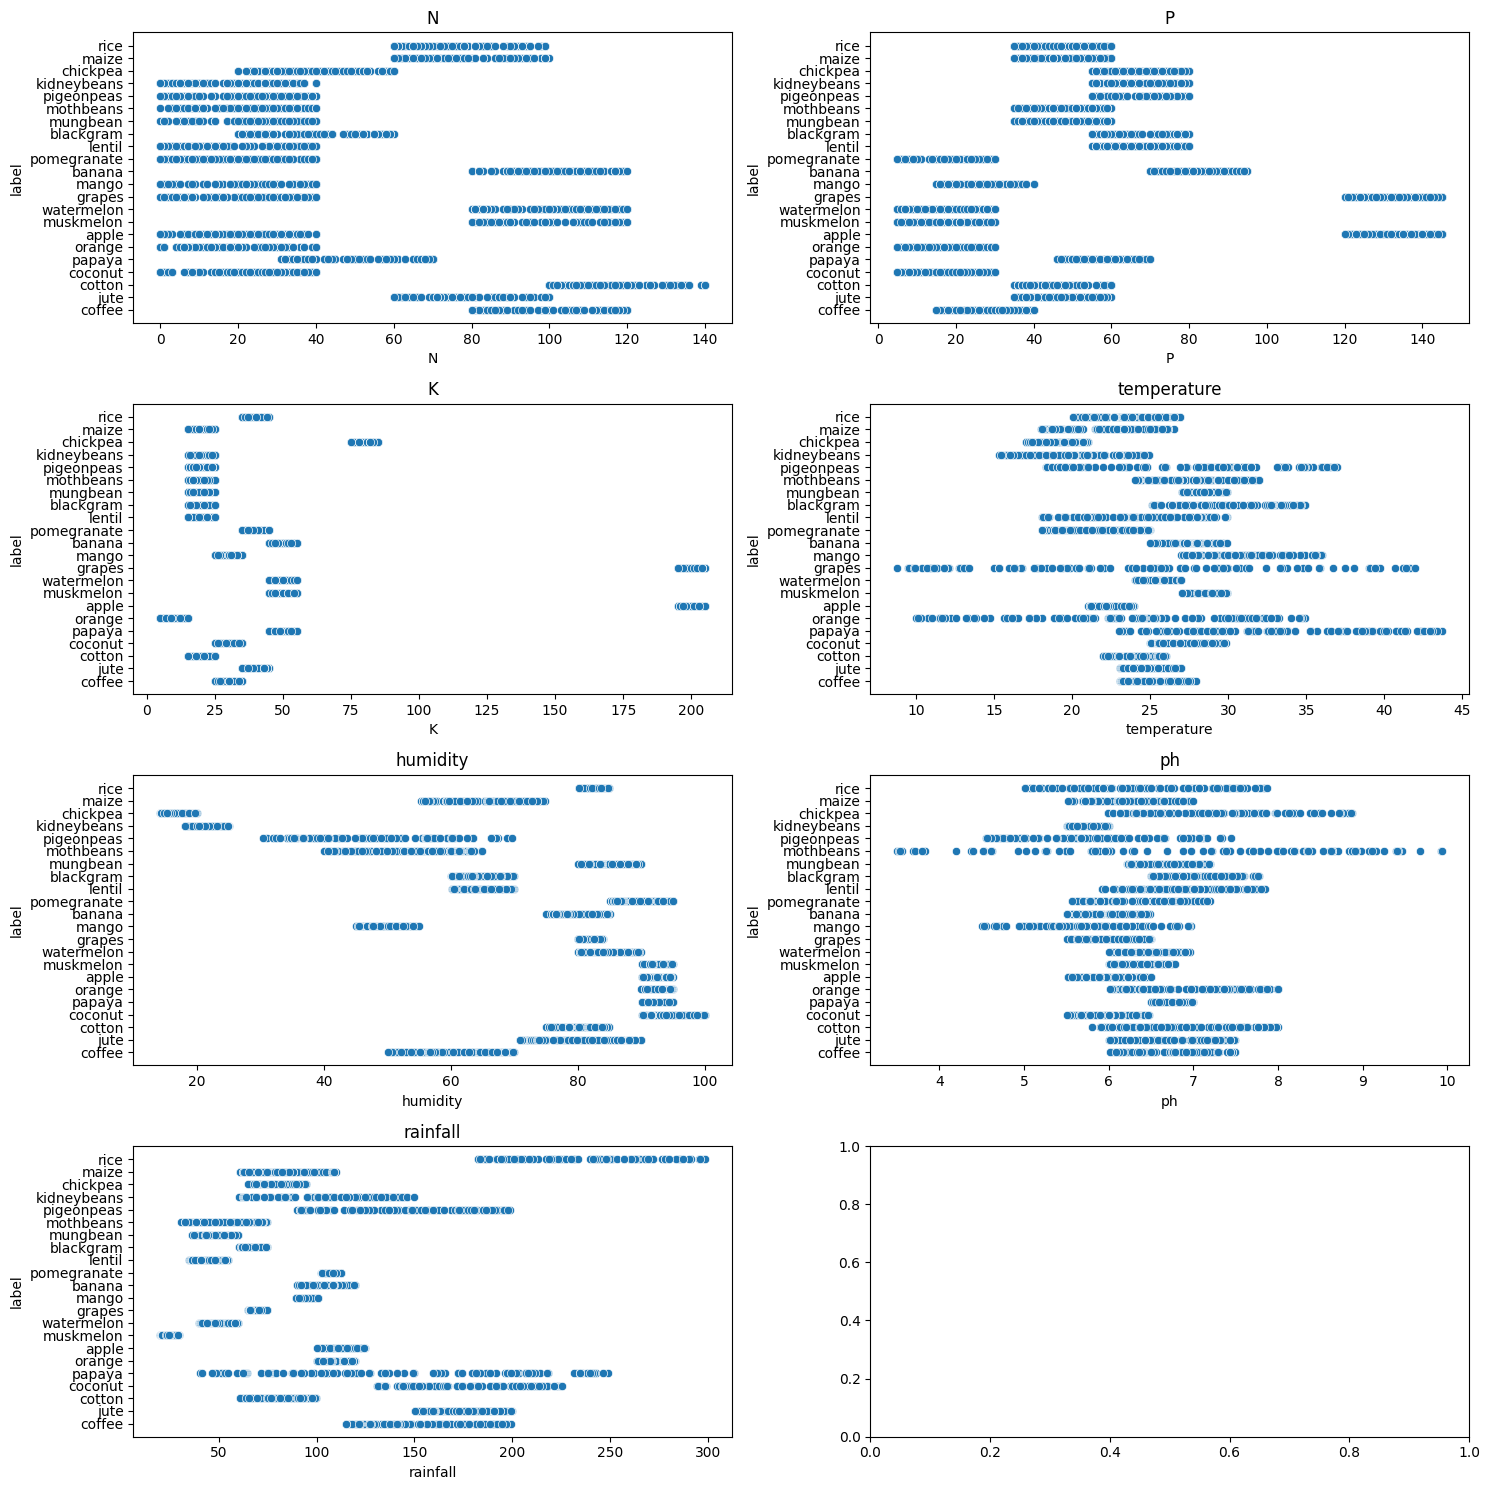

In [59]:
# Bivariate Analysis
fig, ax= plt.subplots(4,2, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=df, ax=subplot)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

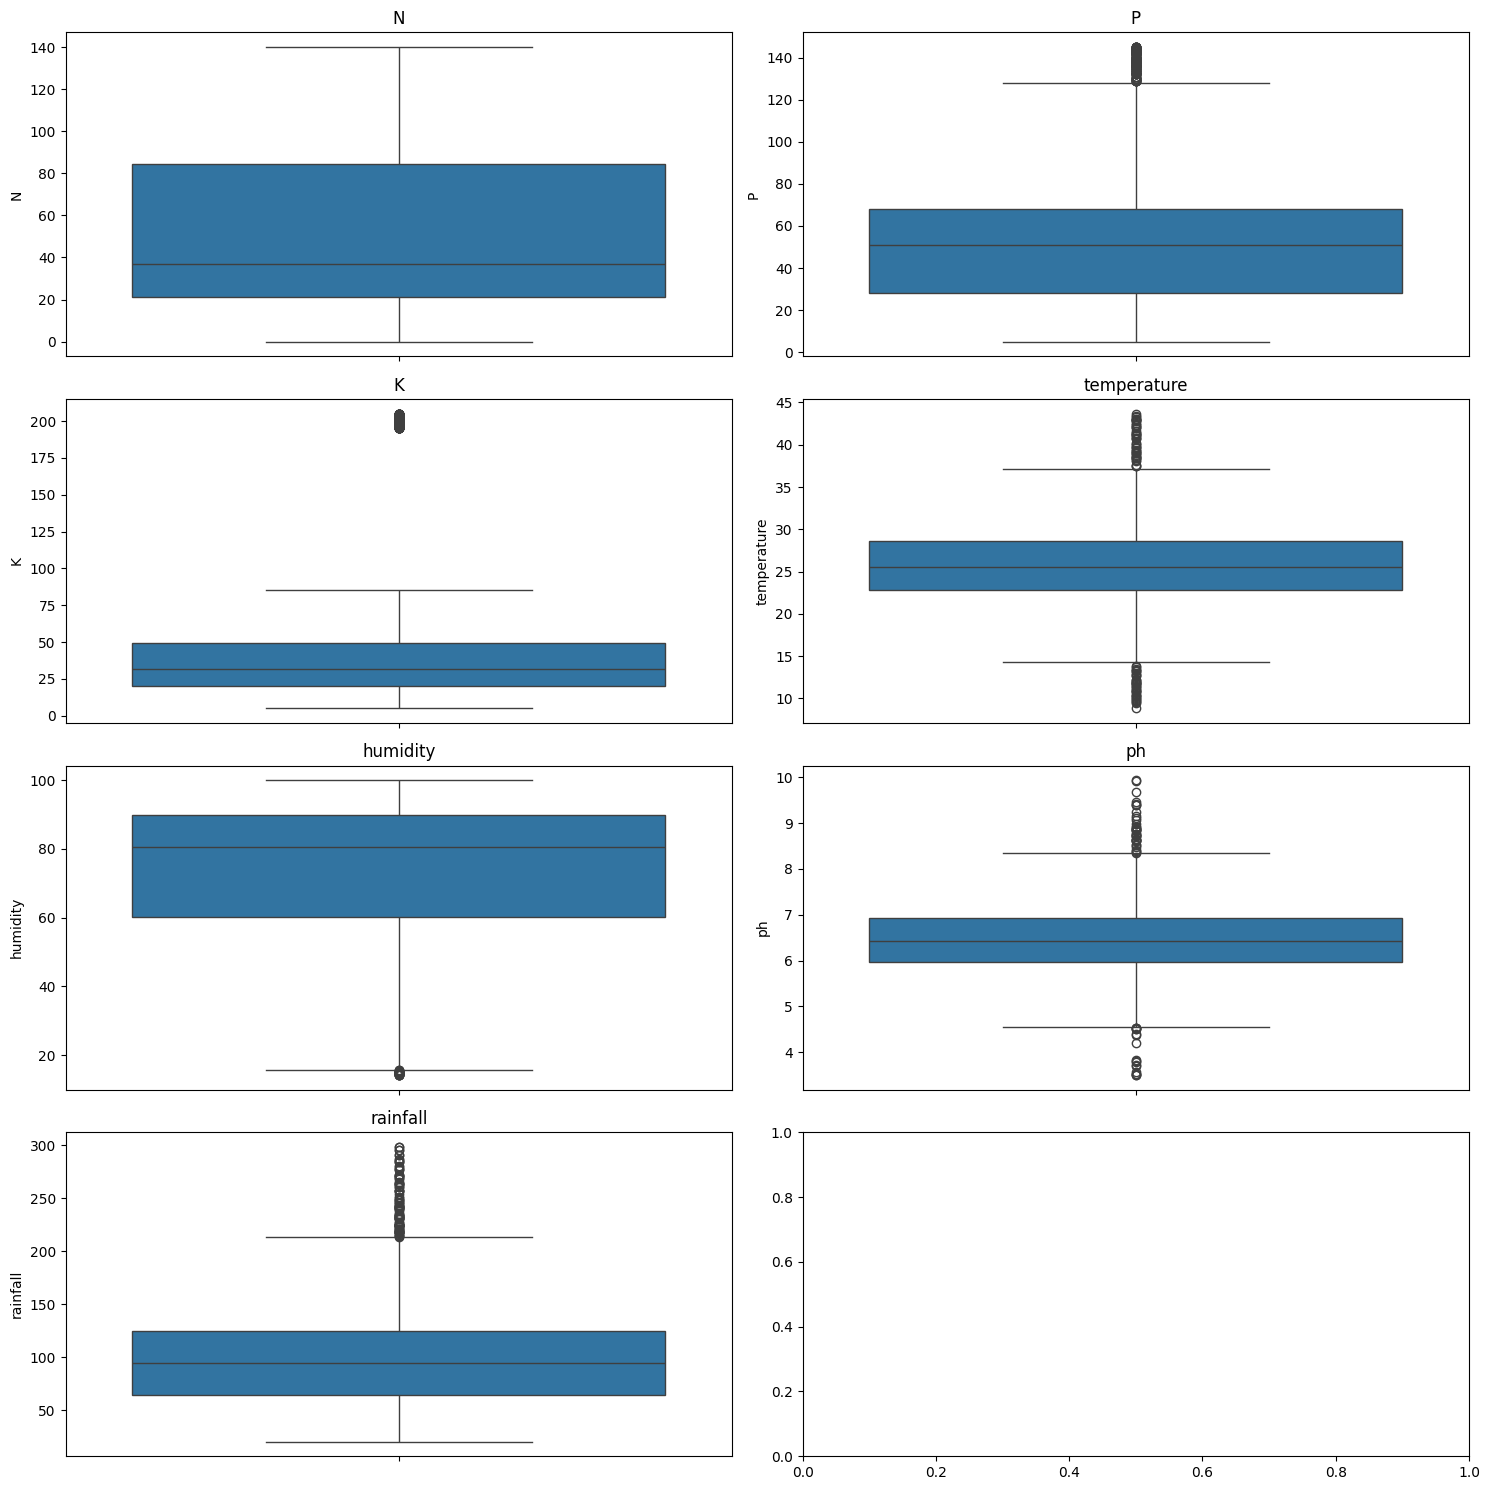

In [60]:
# outlier detection
fig, ax= plt.subplots(4,2, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

In [61]:
# correlation of the features
num_cols= df.select_dtypes(include=np.number)
num_cols.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [62]:
# correlation matrix
corr=num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


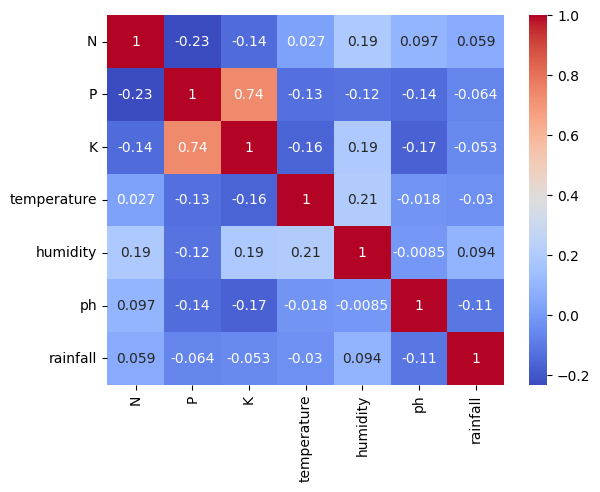

In [63]:
# visualizing correlation with heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Encoding

In [64]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [65]:
df['label'].nunique()

22

In [66]:
crop_dict={
    'rice':1, 'maize':2, 'chickpea':3, 'kidneybeans':4, 'pigeonpeas':5,
       'mothbeans':6, 'mungbean':7, 'blackgram':8, 'lentil':9, 'pomegranate':10,
       'banana':11, 'mango':12, 'grapes':13, 'watermelon':14, 'muskmelon':15, 'apple':16,
       'orange':17, 'papaya':18, 'coconut':19, 'cotton':20, 'jute':21, 'coffee':22
}

In [67]:
df['crop_no']=df['label'].map(crop_dict)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [70]:
df.drop('label', axis=1, inplace=True)

In [71]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
